In [ ]:
import kagglehub
import pandas as pd

def download_titanic():
  path = kagglehub.dataset_download("yasserh/titanic-dataset")

  # Herunterladen des Datensatzes aus dem öffentlich verfügbaren Repositorium.
  titanic = pd.read_csv(
      path+"/Titanic-Dataset.csv")

  return titanic

titanic = download_titanic()
# Anzeigen der ersten Zeilen des Datensatzes.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import kagglehub
import pandas as pd
import numpy as np

titanic.replace('NaN', np.nan, inplace=True)

titanic = titanic.drop(['PassengerId', 'Name'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
import numpy as np

# Erstetzen der NaN strings mit np.NaN zum konsistenten verabrbeiten von NaN.
titanic.replace('NaN', np.nan, inplace=True)

print("Von "+str(len(titanic))+ ":")
# Prüfen welche Spalten wie oft keinen Wert haben.
print(titanic.isnull().sum())

Von 891:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
# Crew haben das Ticket LINE, damit sie gleichermaßen verabreitet werden können
# wird 0 angehängt.
titanic['Ticket'] = titanic['Ticket'].replace('LINE', 'LINE 0')

# Extrahieren der numerischen und prefix Komponente.
ticket_info = titanic['Ticket'].str.extract(r'^(.*?)(\d+)$')
ticket_info = ticket_info.fillna('')

titanic['Prefix'] = ticket_info[0]
titanic['Prefix'] = titanic['Prefix'].replace('', np.nan)

titanic['Ticket'] = ticket_info[1].astype(str)
titanic['Ticket'] = titanic['Ticket'].replace('', np.nan)

# Konvertieren zu numerischen Werten.
titanic['Ticket'] = pd.to_numeric(titanic['Ticket'], errors='coerce')

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,0,3,male,22.0,1,0,21171,7.2500,NaN,S,A/5
1,1,1,female,38.0,1,0,17599,71.2833,C85,C,PC
2,1,3,female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,NaN
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [ ]:
import pandas as pd
import re

cabin_info = titanic['Cabin'].str.extract(r'^(.?)(\d+)$')
cabin_info = cabin_info.fillna('')

# Da sich das Merkmal Cabin in zwei Komponenten teilen läst, wird dies hier gemacht.
titanic[['Deck', 'Cabin']] = cabin_info
titanic['Cabin'] = titanic['Cabin'].replace('', np.nan)
titanic['Deck'] = titanic['Deck'].replace('', np.nan)
titanic['Cabin'] = pd.to_numeric(titanic['Cabin'], errors='coerce')

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
0,0,3,male,22.0,1,0,21171,7.2500,NaN,S,A/5,NaN
1,1,1,female,38.0,1,0,17599,71.2833,85.0,C,PC,C
2,1,3,female,26.0,0,0,3101282,7.9250,NaN,S,STON/O2.,NaN
3,1,1,female,35.0,1,0,113803,53.1000,123.0,S,NaN,C
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split

titanic = titanic.sample(frac=1)

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Der Datensatz muss jetzt aufgeteilt werden, um Datenlecks zu vermeiden.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Trainingset size:", len(X_train))
print("Validationset size:", len(X_valid))
print("Testingset size:", len(X_test))

Trainingset size: 640
Validationset size: 72
Testingset size: 179


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)

cols_for_imputation = ['Age', 'Ticket', 'Fare', 'Parch', 'SibSp', 'Pclass']

# Das Training erfolgt ausschließlich am Trainingsdatensatz!
X_train_imputed = imputer.fit_transform(X_train[cols_for_imputation])
X_valid_imputed = imputer.transform(X_valid[cols_for_imputation])
X_test_imputed = imputer.transform(X_test[cols_for_imputation])

X_train[cols_for_imputation] = X_train_imputed
X_valid[cols_for_imputation] = X_valid_imputed
X_test[cols_for_imputation] = X_test_imputed

print("Von "+str(len(X_train))+ ":")
print(X_train.isnull().sum())

Von 640:
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       511
Embarked      1
Prefix      476
Deck        511
dtype: int64


In [ ]:
titanic['Deck'] = titanic['Deck'].replace(np.nan, 'Unknown')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
9,1,2,female,14.0,1,0,237736,30.0708,NaN,C,NaN,Unknown
299,1,1,female,50.0,0,1,17558,247.5208,NaN,C,PC,Unknown
724,1,1,male,27.0,1,0,113806,53.1000,8.0,S,NaN,E
681,1,1,male,27.0,0,0,17572,76.7292,49.0,C,PC,D
552,0,3,male,NaN,0,0,330979,7.8292,NaN,Q,NaN,Unknown


In [ ]:
from sklearn.impute import SimpleImputer

# Imputation der fehlenden Werte
numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

# Numerische Spalten mit dem Mittelwert imputieren
numerical_imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = numerical_imputer.transform(X_valid[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Kategorische Spalten mit dem häufigsten Wert imputieren
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_valid[categorical_cols] = categorical_imputer.transform(X_valid[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Prüfen, ob noch fehlende Werte vorhanden sind
print("\nNach der Imputation:")
print(X_train.isnull().sum())


Nach der Imputation:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Prefix      0
Deck        0
dtype: int64


In [ ]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
58,2.0,female,5.0,1.0,2.0,34651.0,27.7500,47.418605,S,C.A.,C
20,2.0,male,35.0,0.0,0.0,239865.0,26.0000,47.418605,S,PC,C
130,3.0,male,33.0,0.0,0.0,349241.0,7.8958,47.418605,C,PC,C
419,3.0,female,10.0,0.0,2.0,345773.0,24.1500,47.418605,S,PC,C
244,3.0,male,30.0,0.0,0.0,2694.0,7.2250,47.418605,C,PC,C


In [ ]:
sex_mapping = {'male': 0, 'female': 1}

# Anwenden der Umwandlung.
X_train['Sex'] = X_train['Sex'].map(sex_mapping)
X_valid['Sex'] = X_valid['Sex'].map(sex_mapping)
X_test['Sex'] = X_test['Sex'].map(sex_mapping)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
58,2.0,1,5.0,1.0,2.0,34651.0,27.7500,47.418605,S,C.A.,C
20,2.0,0,35.0,0.0,0.0,239865.0,26.0000,47.418605,S,PC,C
130,3.0,0,33.0,0.0,0.0,349241.0,7.8958,47.418605,C,PC,C
419,3.0,1,10.0,0.0,2.0,345773.0,24.1500,47.418605,S,PC,C
244,3.0,0,30.0,0.0,0.0,2694.0,7.2250,47.418605,C,PC,C


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# Encodieren des Merkmals.
X_train['Pclass'] = encoder.fit_transform(X_train[['Pclass']])
X_valid['Pclass'] = encoder.transform(X_valid[['Pclass']])
X_test['Pclass'] = encoder.transform(X_test[['Pclass']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Deck
58,1.0,1,5.0,1.0,2.0,34651.0,27.7500,47.418605,S,C.A.,C
20,1.0,0,35.0,0.0,0.0,239865.0,26.0000,47.418605,S,PC,C
130,2.0,0,33.0,0.0,0.0,349241.0,7.8958,47.418605,C,PC,C
419,2.0,1,10.0,0.0,2.0,345773.0,24.1500,47.418605,S,PC,C
244,2.0,0,30.0,0.0,0.0,2694.0,7.2250,47.418605,C,PC,C


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Trainieren des Encoders
encoder.fit(X_train[['Embarked', 'Deck']])

# Anwenden des Encoders auf die Daten
encoded_cols_train = encoder.transform(X_train[['Embarked', 'Deck']])
encoded_cols_valid = encoder.transform(X_valid[['Embarked', 'Deck']])
encoded_cols_test = encoder.transform(X_test[['Embarked', 'Deck']])

# Erstellen der Spalten.
encoded_feature_names = encoder.get_feature_names_out(['Embarked', 'Deck'])
encoded_train_df = pd.DataFrame(encoded_cols_train, columns=encoded_feature_names, index=X_train.index)
encoded_valid_df = pd.DataFrame(encoded_cols_valid, columns=encoded_feature_names, index=X_valid.index)
encoded_test_df = pd.DataFrame(encoded_cols_test, columns=encoded_feature_names, index=X_test.index)

# Zusammenhängen der Datenframes.
X_train = pd.concat([X_train.drop(['Embarked', 'Deck'], axis=1), encoded_train_df], axis=1)
X_valid = pd.concat([X_valid.drop(['Embarked', 'Deck'], axis=1), encoded_valid_df], axis=1)
X_test = pd.concat([X_test.drop(['Embarked', 'Deck'], axis=1), encoded_test_df], axis=1)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
58,1.0,1,5.0,1.0,2.0,34651.0,27.7500,47.418605,C.A.,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,1.0,0,35.0,0.0,0.0,239865.0,26.0000,47.418605,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130,2.0,0,33.0,0.0,0.0,349241.0,7.8958,47.418605,PC,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
419,2.0,1,10.0,0.0,2.0,345773.0,24.1500,47.418605,PC,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
244,2.0,0,30.0,0.0,0.0,2694.0,7.2250,47.418605,PC,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()

X_train['Prefix'] = encoder.fit_transform(X_train[['Prefix']], y_train)

X_valid['Prefix'] = encoder.transform(X_valid[['Prefix']])
X_test['Prefix'] = encoder.transform(X_test[['Prefix']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Prefix,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G
58,1.0,1,5.0,1.0,2.0,34651.0,27.7500,47.418605,0.448298,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,1.0,0,35.0,0.0,0.0,239865.0,26.0000,47.418605,0.403336,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130,2.0,0,33.0,0.0,0.0,349241.0,7.8958,47.418605,0.403336,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
419,2.0,1,10.0,0.0,2.0,345773.0,24.1500,47.418605,0.398535,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
244,2.0,0,30.0,0.0,0.0,2694.0,7.2250,47.418605,0.404770,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


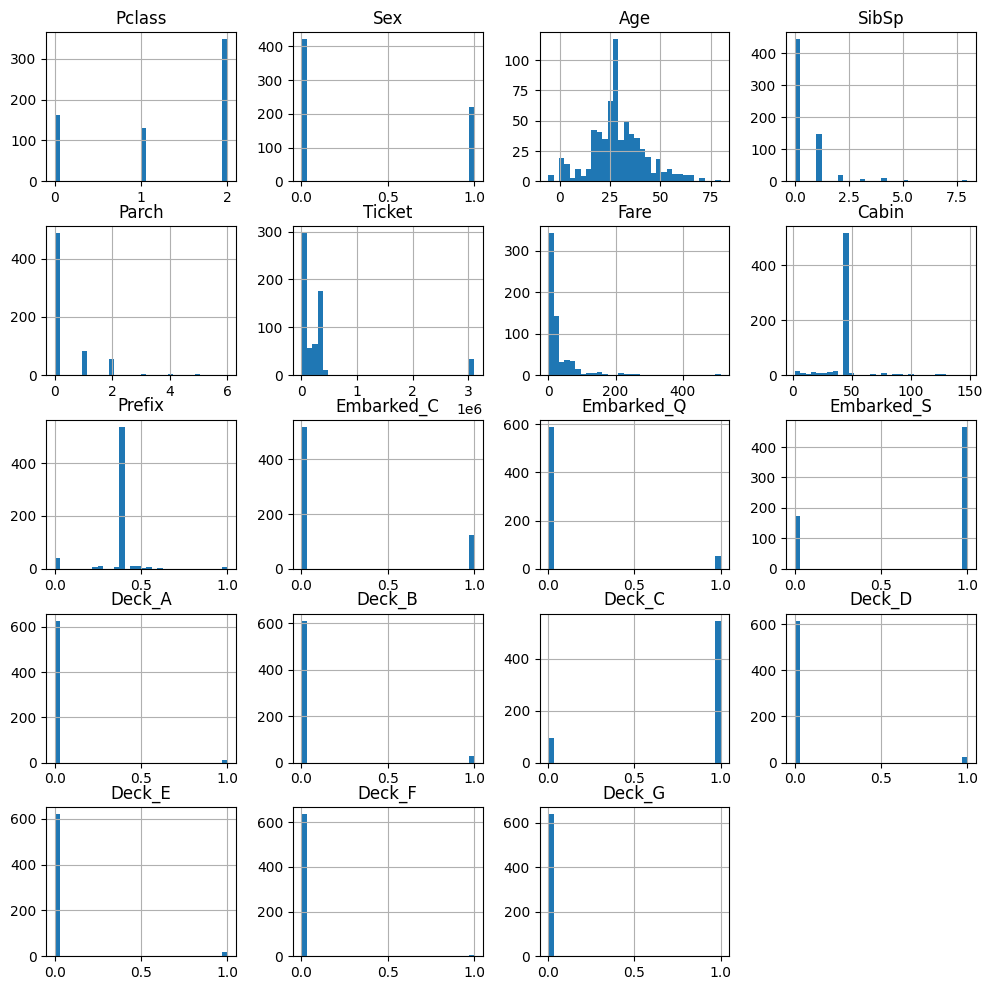

In [ ]:
import matplotlib.pyplot as plt

X_train.hist(bins=32, figsize=(12,12))
plt.show()

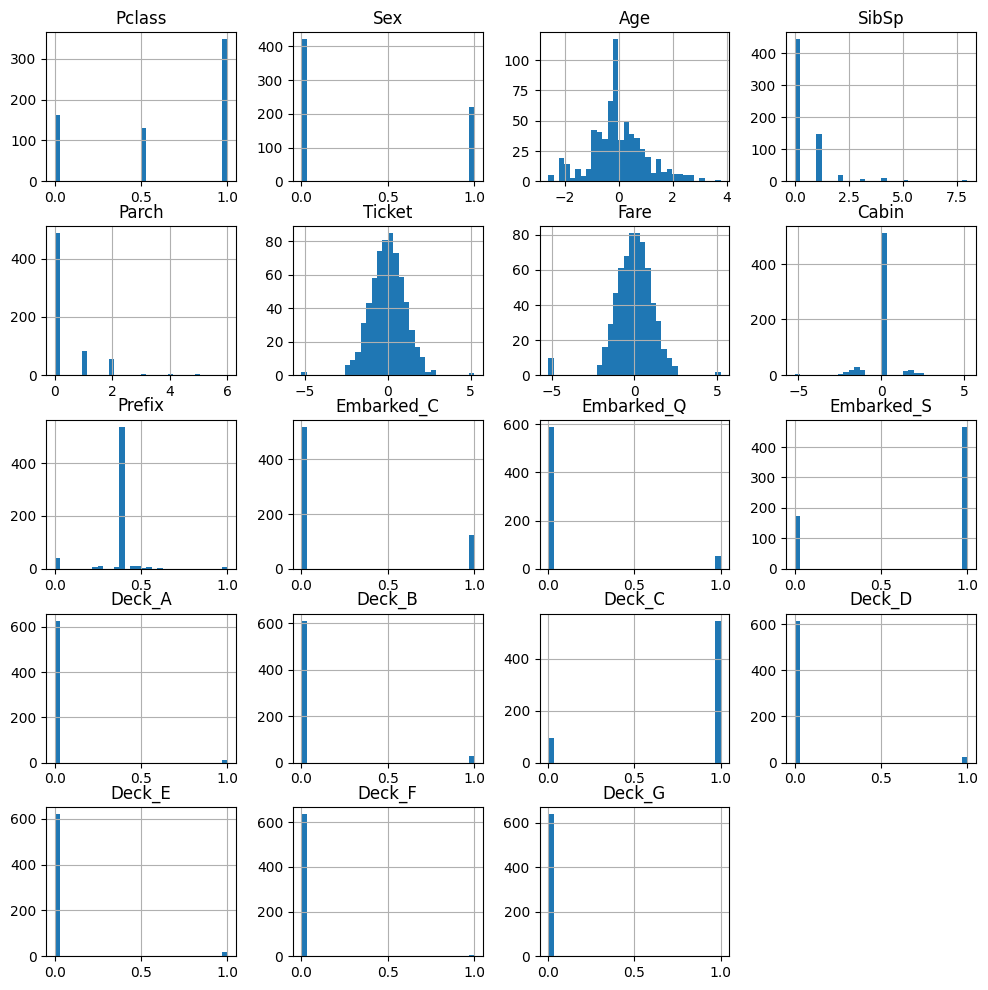

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

scaler_age = StandardScaler()
scaler_pclass = MinMaxScaler()
scaler_parch = RobustScaler()
scaler_sibsp = RobustScaler()
scaler_ticket_cabin = QuantileTransformer(output_distribution='normal',n_quantiles=128) # Example, adjust as needed

X_train['Age'] = scaler_age.fit_transform(X_train[['Age']])
X_train['Pclass'] = scaler_pclass.fit_transform(X_train[['Pclass']])
X_train['Parch'] = scaler_parch.fit_transform(X_train[['Parch']])
X_train['SibSp'] = scaler_sibsp.fit_transform(X_train[['SibSp']])
X_train[['Ticket', 'Cabin', 'Fare']] = scaler_ticket_cabin.fit_transform(X_train[['Ticket', 'Cabin', 'Fare']])

def apply_scaler(X):
  X['Age'] = scaler_age.transform(X[['Age']])
  X['Pclass'] = scaler_pclass.transform(X[['Pclass']])
  X['Parch'] = scaler_parch.transform(X[['Parch']])
  X['SibSp'] = scaler_sibsp.transform(X[['SibSp']])
  X[['Ticket', 'Cabin', 'Fare']] = scaler_ticket_cabin.transform(X[['Ticket', 'Cabin', 'Fare']])
  return X

X_valid = apply_scaler(X_valid)
X_test = apply_scaler(X_test)

X_train.hist(bins=32, figsize=(12,12))
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialisieren des Gradient Boosting Klassifikators
gb_classifier = GradientBoostingClassifier(random_state=42, loss='log_loss', learning_rate=0.1, n_estimators=100)

# Trainieren des Klassifikators
gb_classifier.fit(X_train, y_train)

# Vorhersagen auf dem Testdatensatz treffen
y_pred = gb_classifier.predict(X_valid)

# Bewerten des Modells anhand der Genauigkeit
accuracy = accuracy_score(y_valid, y_pred)
print(f"Genauigkeit des Gradient Boosting Modells: {accuracy}")

Genauigkeit des Gradient Boosting Modells: 0.8055555555555556


In [ ]:
# Hyperparameter
LEARNING_RATE = 1e-3
EPOCHS = 64
PATIENCE = 7;

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid.values, y_valid.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

train_dataset = train_dataset.shuffle(len(X_train)).batch(1)
valid_dataset = valid_dataset.batch(1)
test_dataset = test_dataset.batch(1)

In [ ]:
import tensorflow as tf

class WeightedCrossEntropy(tf.keras.losses.Loss):
    def __init__(self, pos_weight=1.0, name="weighted_cross_entropy"):
        """
        Gewichteter Cross-Entropy-Verlust.

        Args:
            pos_weight (float): Gewicht für die positive Klasse (1er).
                               Höhere Werte bestrafen falsch-negative Vorhersagen stärker.
            name (str): Name der Verlustfunktion.
        """
        super().__init__(name=name)
        self.pos_weight = pos_weight

    def call(self, y_true, y_pred):
        """
        Berechnet den gewichteten binären Cross-Entropy-Verlust.

        Args:
            y_true (tensor): Wahre Labels (0 oder 1).
            y_pred (tensor): Vorhergesagte Wahrscheinlichkeiten (zwischen 0 und 1).

        Returns:
            Gewichteter binärer Cross-Entropy-Verlust.
        """
        y_true = tf.reshape(y_true, tf.shape(y_pred))

        # Standard Binary Cross-Entropy berechnen
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)

        # Gewichtung auf die positive Klasse anwenden
        weight = y_true * self.pos_weight + (1 - y_true)  # 1 für negative, pos_weight für positive Beispiele
        return tf.reduce_mean(weight * bce)

In [ ]:
import tensorflow as tf

def model_builder(hp):
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  hp_regularization_rate = hp.Float('regularization_rate', min_value=0.01, max_value=0.1, step=0.02)

  # Hier wird ein einfaches Modell aufgebaut.
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input((19,), name="Input"),
    tf.keras.layers.Dense(hp_units, name="DenseLayer1", kernel_regularizer=tf.keras.regularizers.L1(hp_regularization_rate)),
    tf.keras.layers.Activation("relu", name="ReLu1"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, name="Layer2", kernel_regularizer=tf.keras.regularizers.L2(hp_regularization_rate)),
    tf.keras.layers.Activation("leaky_relu", name="LeakyReLu1"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, name="Layer3", kernel_regularizer=tf.keras.regularizers.L2(hp_regularization_rate)),
    tf.keras.layers.Activation("relu", name="ReLu2"),
    tf.keras.layers.Dense(1, name="Layer4"),
    tf.keras.layers.Activation("sigmoid", name="Sigmoid"),
  ])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      hp_learning_rate,
      decay_steps=2048,
      decay_rate=0.96)

  model.compile(optimizer=tf.keras.optimizers.Adam(
                          learning_rate=lr_schedule,
                          beta_1=0.9,
                          beta_2=0.999),
                loss=WeightedCrossEntropy(2.5),
                metrics=['accuracy'])
  return model

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=8,# Damit es etwas schneller geht, normalerweise => EPOCHS,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

Reloading Tuner from my_dir/intro_to_kt/tuner0.json


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=PATIENCE)

tuner.search(train_dataset,
            validation_data=valid_dataset,
            epochs=8,# Damit es etwas schneller geht, normalerweise => EPOCHS,
            callbacks=[early_stopping])

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

model = model_builder(best_hps)

# Anzeigen der Zusammenfassung des Modells.
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ DenseLayer1 (Dense)                  │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ReLu1 (Activation)                   │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer2 (Dense)                       │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LeakyReLu1 (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer3 (Dense)                       │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ReLu2 (Activation)                   │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer4 (Dense)                       │ (None, 1)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Sigmoid (Activation)                 │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,497 (25.38 KB)

 Trainable params: 6,497 (25.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best.keras",
                    monitor="val_loss", mode="min",
                    save_best_only=True, verbose=1)

# Trainieren des Modells
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[early_stopping, checkpoint]
)

model.load_weights("best.keras")

# Auswerten des Modells auf den Testdaten
model.evaluate(X_test, y_test, verbose=0)

Epoch 1/64
638/640 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5879 - loss: 2.6631
Epoch 1: val_loss improved from inf to 1.58187, saving model to best.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5881 - loss: 2.6609 - val_accuracy: 0.7877 - val_loss: 1.5819
Epoch 2/64
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7120 - loss: 1.4885
Epoch 2: val_loss improved from 1.58187 to 1.16016, saving model to best.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7120 - loss: 1.4883 - val_accuracy: 0.7821 - val_loss: 1.1602
Epoch 3/64
628/640 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7410 - loss: 1.1878
Epoch 3: val_loss improved from 1.16016 to 1.02463, saving model to best.keras
640/640 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7416 - loss: 1.1865 - val_accuracy: 0.7989 - val_loss: 1.0246
Epoch 4/64
638/640 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7544 - loss: 1.1065
Epoch 4: val_loss improved from 1.02463 to 0.97886, saving model to best

[0.8405835628509521, 0.7932960987091064]

Acc: 0.7777777777777778
Recall: 0.8214285714285714
Precision: 0.6764705882352942


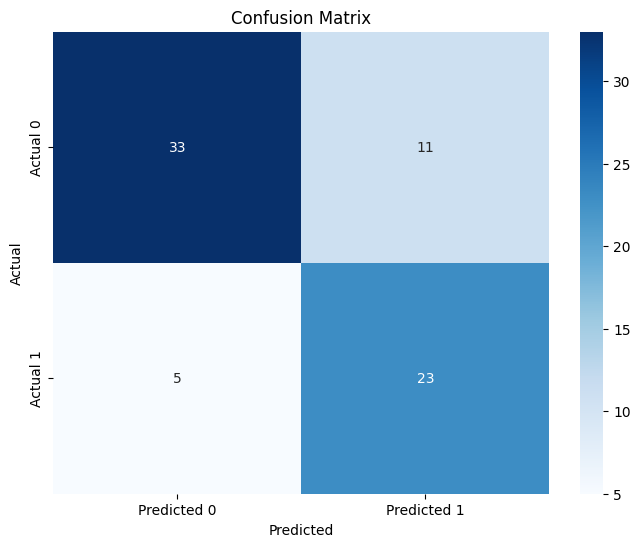

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import recall_score, precision_score

y_pred_prob = model.predict(X_valid, verbose = 0)
y_pred = (y_pred_prob > 0.5).astype(int)

def evaluate(X, y, y_pred):
  # Berechnen von reecall und precision
  recall = recall_score(y, y_pred)
  precision = precision_score(y, y_pred)

  print(f"Acc: {accuracy_score(y, y_pred)}")
  print(f"Recall: {recall}")
  print(f"Precision: {precision}")

  # Berechnen der Confusion Matrix
  cm = confusion_matrix(y, y_pred)

  # Anzeigen der Confusion Matrix als Heatmap
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

evaluate(X_valid, y_valid, y_pred)

Acc: 0.8055555555555556
Recall: 0.7142857142857143
Precision: 0.7692307692307693


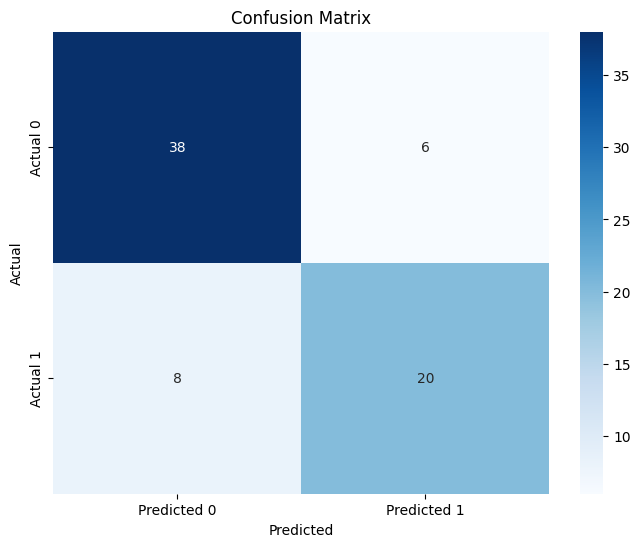

In [ ]:
# Vergleichen mit den Resultaten des GradientBoostedClassifiers.
y_pred = gb_classifier.predict(X_valid)
evaluate(X_valid, y_valid, y_pred)

Accuracy: 0.7832 +/- 0.0368
Recall: 0.8536 +/- 0.0365
Precision: 0.6718 +/- 0.0616
-----------
Acc: 0.7932960893854749
Recall: 0.8529411764705882
Precision: 0.6823529411764706


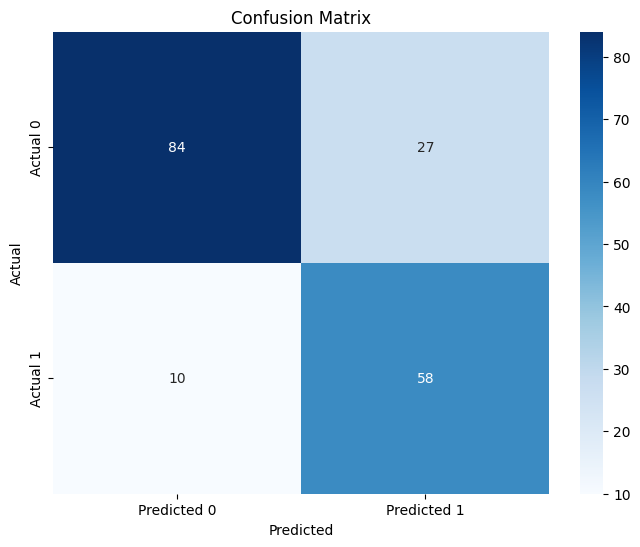

In [ ]:
# Nachdem sich nach dem Vergleich der Modelle für das NN Modell entschieden wurde,
# kann dessen Performance nun am Testdatensatz bestimmt werden. (Recall - Panik vermeiden)

import numpy as np
from sklearn.utils import resample

# Anzahl der Bootstrap-Iterationen
n_iterations = 10 # 100 wenn du mehr Zeit hast

# Leere Listen für die Speicherung der Metriken
accuracy_scores = []
recall_scores = []
precision_scores = []

# Bootstrap-Schleife
for _ in range(n_iterations):
  # Bootstrap-Stichprobe des Testdatensatzes
  X_test_bootstrap, y_test_bootstrap = resample(X_test, y_test)

  # Vorhersagen mit dem Modell auf der Bootstrap-Stichprobe
  y_pred_prob = model.predict(X_test_bootstrap, verbose=0)
  y_pred = (y_pred_prob > 0.5).astype(int)

  # Berechnen der Metriken für die Bootstrap-Stichprobe
  accuracy = accuracy_score(y_test_bootstrap, y_pred)
  recall = recall_score(y_test_bootstrap, y_pred)
  precision = precision_score(y_test_bootstrap, y_pred)

  # Speichern der Metriken
  accuracy_scores.append(accuracy)
  recall_scores.append(recall)
  precision_scores.append(precision)

# Berechnen des Mittelwerts und der Standardabweichung für die Metriken
print("Accuracy: {:.4f} +/- {:.4f}".format(np.mean(accuracy_scores), np.std(accuracy_scores)))
print("Recall: {:.4f} +/- {:.4f}".format(np.mean(recall_scores), np.std(recall_scores)))
print("Precision: {:.4f} +/- {:.4f}".format(np.mean(precision_scores), np.std(precision_scores)))
print("-----------")
y_pred_prob = model.predict(X_test, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int)

evaluate(X_test, y_test, y_pred)